In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.cluster import KMeans

## Casos Confirmados

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,40,74,84,94,110,110,120,170,174,237
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,104,123,146,174,186,197,212,223,243,259
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,230,264,302,367,409,454,511,584,716,847
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,133,164,188,224,267,308,334,370,376,390
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,3,3,3,4,4,5,7,7,7,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,Turks and Caicos Islands,United Kingdom,21.694000,-71.797900,0,0,0,0,0,0,...,0,0,0,0,0,4,4,5,5,6
252,NaN,MS Zaandam,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,2,2,2,2,9
253,NaN,Botswana,-22.328500,24.684900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,4,4
254,NaN,Burundi,-3.373100,29.918900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2


In [3]:
China = df.groupby(df['Country/Region'] == 'China').sum()
China

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
False,4503.592738,2244.241367,7,11,21,28,43,50,69,79,...,296737,336454,385992,447809,511394,578707,637995,700167,775208,850244
True,1083.336700,3684.419700,548,643,920,1406,2075,2877,5509,6087,...,81498,81591,81661,81782,81897,81999,82122,82198,82279,82361


In [4]:
china = China.iloc[:,2:72]
china

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
False,7,11,21,28,43,50,69,79,93,125,...,255518,296737,336454,385992,447809,511394,578707,637995,700167,775208
True,548,643,920,1406,2075,2877,5509,6087,8141,9802,...,81435,81498,81591,81661,81782,81897,81999,82122,82198,82279


In [5]:
china_c = china.transpose()
china_c

Country/Region,False,True
1/22/20,7,548
1/23/20,11,643
1/24/20,21,920
1/25/20,28,1406
1/26/20,43,2075
...,...,...
3/27/20,511394,81897
3/28/20,578707,81999
3/29/20,637995,82122
3/30/20,700167,82198


In [6]:
china_c.columns = ['OtrosPaises','China']
china_c

,OtrosPaises,China
1/22/20,7,548
1/23/20,11,643
1/24/20,21,920
1/25/20,28,1406
1/26/20,43,2075
...,...,...
3/27/20,511394,81897
3/28/20,578707,81999
3/29/20,637995,82122
3/30/20,700167,82198


In [7]:
china_c['Days'] = range(0,70)
china_c

,OtrosPaises,China,Days
1/22/20,7,548,0
1/23/20,11,643,1
1/24/20,21,920,2
1/25/20,28,1406,3
1/26/20,43,2075,4
...,...,...,...
3/27/20,511394,81897,65
3/28/20,578707,81999,66
3/29/20,637995,82122,67
3/30/20,700167,82198,68


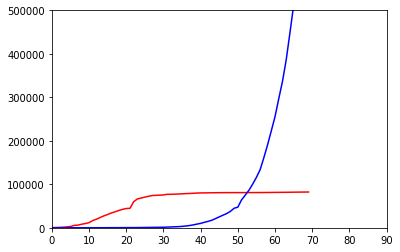

In [8]:
plt.plot(china_c['Days'],china_c['China'], c='red')
plt.plot(china_c['Days'],china_c['OtrosPaises'], c='blue')
plt.xlim(0,90)
plt.ylim(0,500000)
plt.show()

## Argentina

In [9]:
Arg_C = df.groupby(df['Country/Region'] == 'Argentina').sum()
Arg_C

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
False,5625.345538,5992.277767,555,654,941,1434,2118,2927,5578,6166,...,377934,417658,467266,529089,592702,660016,719372,781545,856433,931551
True,-38.416100,-63.616700,0,0,0,0,0,0,0,0,...,301,387,387,502,589,690,745,820,1054,1054


In [10]:
Arg_Co = Arg_C.iloc[:,2:72]
Arg_Con = Arg_Co.transpose()
Arg_Con.columns = ['OtrosPaises','Arg']
Arg_Con

,OtrosPaises,Arg
1/22/20,555,0
1/23/20,654,0
1/24/20,941,0
1/25/20,1434,0
1/26/20,2118,0
...,...,...
3/27/20,592702,589
3/28/20,660016,690
3/29/20,719372,745
3/30/20,781545,820


In [11]:
Arg_Con['Days'] = range(0,70)
Arg_Con

,OtrosPaises,Arg,Days
1/22/20,555,0,0
1/23/20,654,0,1
1/24/20,941,0,2
1/25/20,1434,0,3
1/26/20,2118,0,4
...,...,...,...
3/27/20,592702,589,65
3/28/20,660016,690,66
3/29/20,719372,745,67
3/30/20,781545,820,68


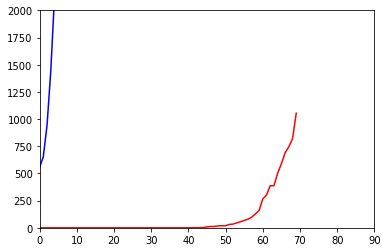

In [12]:
plt.plot(Arg_Con['Days'],Arg_Con['Arg'], c='red')
plt.plot(Arg_Con['Days'],Arg_Con['OtrosPaises'], c='blue')
plt.xlim(0,90)
plt.ylim(0,2000)
plt.show()

## Muertes Confirmadas

In [13]:
deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,1,1,2,4,4,4,4,4,4,4
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,4,5,5,6,8,10,10,11,15,15
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,17,19,21,25,26,29,31,35,44,58
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,1,1,1,3,3,3,6,8,12,14
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,Turks and Caicos Islands,United Kingdom,21.694000,-71.797900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
252,NaN,MS Zaandam,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
253,NaN,Botswana,-22.328500,24.684900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
254,NaN,Burundi,-3.373100,29.918900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
ChinaD = deaths.groupby(deaths['Country/Region'] == 'China').sum()
ChinaD

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
False,4503.592738,2244.241367,0,0,0,0,0,0,0,0,...,13231,15344,17896,20679,23902,27353,30621,34274,38798,43493
True,1083.336700,3684.419700,17,18,26,42,56,82,131,133,...,3274,3281,3285,3291,3296,3299,3304,3308,3309,3316


In [15]:
chinaD = ChinaD.iloc[:,2:72]
chinaD

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
False,0,0,0,0,0,0,0,0,0,0,...,11377,13231,15344,17896,20679,23902,27353,30621,34274,38798
True,17,18,26,42,56,82,131,133,171,213,...,3274,3274,3281,3285,3291,3296,3299,3304,3308,3309


In [16]:
chinaD_c = chinaD.transpose()
chinaD_c

Country/Region,False,True
1/22/20,0,17
1/23/20,0,18
1/24/20,0,26
1/25/20,0,42
1/26/20,0,56
...,...,...
3/27/20,23902,3296
3/28/20,27353,3299
3/29/20,30621,3304
3/30/20,34274,3308


In [17]:
chinaD_c.columns = ['OtrosPaises','China']
chinaD_c['Days'] = range(0,70)
chinaD_c

,OtrosPaises,China,Days
1/22/20,0,17,0
1/23/20,0,18,1
1/24/20,0,26,2
1/25/20,0,42,3
1/26/20,0,56,4
...,...,...,...
3/27/20,23902,3296,65
3/28/20,27353,3299,66
3/29/20,30621,3304,67
3/30/20,34274,3308,68


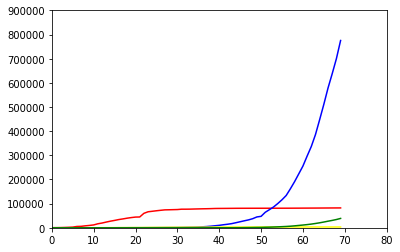

In [18]:
plt.plot(china_c['Days'],china_c['China'], c='red')
plt.plot(china_c['Days'],china_c['OtrosPaises'], c='blue')
plt.plot(chinaD_c['Days'],chinaD_c['China'], c='Yellow',label='Deaths')
plt.plot(chinaD_c['Days'],chinaD_c['OtrosPaises'], c='Green', label='Deaths')
plt.xlim(0,80)
plt.ylim(0,900000)
plt.show()

## Argentina

In [19]:
Arg_D = deaths.groupby(deaths['Country/Region'] == 'Argentina').sum()
Arg_D

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
False,5625.345538,5992.277767,17,18,26,42,56,82,131,133,...,16501,18619,21173,23961,27185,30634,33906,37559,42080,46781
True,-38.416100,-63.616700,0,0,0,0,0,0,0,0,...,4,6,8,9,13,18,19,23,27,28


In [20]:
Arg_De = Arg_D.iloc[:,2:72]
Arg_De

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
False,17,18,26,42,56,82,131,133,171,213,...,14647,16501,18619,21173,23961,27185,30634,33906,37559,42080
True,0,0,0,0,0,0,0,0,0,0,...,4,4,6,8,9,13,18,19,23,27


In [21]:
Arg_Dea = Arg_De.transpose()
Arg_Dea

Country/Region,False,True
1/22/20,17,0
1/23/20,18,0
1/24/20,26,0
1/25/20,42,0
1/26/20,56,0
...,...,...
3/27/20,27185,13
3/28/20,30634,18
3/29/20,33906,19
3/30/20,37559,23


In [22]:
Arg_Dea.columns = ['OtrosPaises','Arg']
Arg_Dea['Days'] = range(0,70)
Arg_Dea

,OtrosPaises,Arg,Days
1/22/20,17,0,0
1/23/20,18,0,1
1/24/20,26,0,2
1/25/20,42,0,3
1/26/20,56,0,4
...,...,...,...
3/27/20,27185,13,65
3/28/20,30634,18,66
3/29/20,33906,19,67
3/30/20,37559,23,68


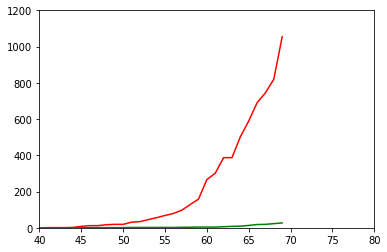

In [23]:
plt.plot(Arg_Con['Days'],Arg_Con['Arg'], c='red')
#plt.plot(Arg_Con['Days'],Arg_Dea['OtrosPaises'], c='blue')
plt.plot(Arg_Dea['Days'],Arg_Dea['Arg'], c='Green',label='Deaths')
#plt.plot(Arg_Dea['Days'],Arg_Dea['OtrosPaises'], c='blue', label='Deaths')
plt.xlim(40,80)
plt.ylim(0,1200)
plt.show()

## Prediccion 

In [24]:
reg = Arg_Con.copy()

In [25]:
reg1 = reg.loc[reg['Arg']>= 1]
reg1['LogInfections'] = np.log(reg.Arg)
reg1

/Users/maitu/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/maitu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,OtrosPaises,Arg,Days,LogInfections
3/3/20,92839,1,41,0.000000
3/4/20,95119,1,42,0.000000
3/5/20,97885,1,43,0.000000
3/6/20,101799,2,44,0.693147
3/7/20,105839,8,45,2.079442
3/8/20,109809,12,46,2.484907
3/9/20,113578,12,47,2.484907
3/10/20,118603,17,48,2.833213
3/11/20,125856,19,49,2.944439
3/12/20,128333,19,50,2.944439


In [26]:
x = reg1.Days
x = sm.add_constant(x)
y = reg1.LogInfections

/Users/maitu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [27]:
mod = sm.OLS(y,x)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          LogInfections   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     627.4
Date:                Thu, 02 Apr 2020   Prob (F-statistic):           3.17e-20
Time:                        11:35:42   Log-Likelihood:                -16.314
No. Observations:                  29   AIC:                             36.63
Df Residuals:                      27   BIC:                             39.36
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.4245      0.543    -17.342      0.000     -10.540      -8.309
Days           0.2447      0.010     25.047      0.000       0.225       0.265
==============================================================================
Omnibus:                        4.529   Durbin-Watson:                   0.404
Prob(Omnibus):                  0.104   Jarque-Bera (JB):                3.615
Skew:                          -0.865   Prob(JB):                        0.164
Kurtosis:                       3.011   Cond. No.                         370.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

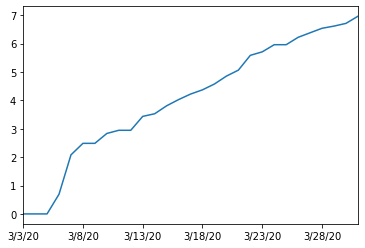

In [28]:
reg1['LogInfections'].plot()

In [29]:
x0 = np.exp(-9.4245)
b = np.exp(0.2447)

In [30]:
def linear_predictions(t):
    return x0*b**t

In [31]:
reg1['Predictions'] = reg1.Days.apply(linear_predictions)
reg1

/Users/maitu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,OtrosPaises,Arg,Days,LogInfections,Predictions
3/3/20,92839,1,41,0.000000,1.837122
3/4/20,95119,1,42,0.000000,2.346442
3/5/20,97885,1,43,0.000000,2.996965
3/6/20,101799,2,44,0.693147,3.827837
3/7/20,105839,8,45,2.079442,4.889060
3/8/20,109809,12,46,2.484907,6.244493
3/9/20,113578,12,47,2.484907,7.975705
3/10/20,118603,17,48,2.833213,10.186874
3/11/20,125856,19,49,2.944439,13.011063
3/12/20,128333,19,50,2.944439,16.618225


In [33]:
a = np.linspace(1000,1000, 1000)

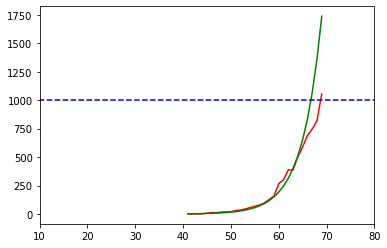

In [34]:
plt.plot(reg1['Days'],reg1['Arg'], c='red',label='Real')
plt.plot(reg1['Days'],reg1['Predictions'], c='green', label='Prediction')
plt.plot(a, c='blue', linestyle='dashed', label='Prediction')
plt.plot(b, c='blue', label='Prediction', linestyle='dashed')
plt.xlim(10,80)
plt.show()

In [37]:
mod = sm.GLM(reg1['Arg'], reg1['Days'],
             family=sm.families.Poisson(link=sm.families.links.log))
res = mod.fit()

/Users/maitu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  


In [38]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    Arg   No. Observations:                   29
Model:                            GLM   Df Residuals:                       28
Model Family:                 Poisson   Df Model:                            0
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1174.6
Date:                Thu, 02 Apr 2020   Deviance:                       2178.4
Time:                        11:37:28   Pearson chi2:                 1.67e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Days           0.0942      0.000    479.856      0.000       0.094       0.095
==============================================================================
"""

TypeError: 'GLMResultsWrapper' object is not callable